In [2]:
# Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
data = pd.read_csv("dataset/house_prices.csv")


# Display the first 5 rows to confirm it's loaded properly
data.head()

,id,area_sqft,bedrooms,bathrooms,parking_floors,location_rating,age_years,price
0,1,1200,2,2,1,8,5,6500000
1,2,900,2,1,1,6,12,4200000
2,3,1500,3,2,1,7,8,7800000
3,4,2000,4,3,2,9,3,12500000
4,5,850,1,1,0,5,15,3800000


In [8]:
# Check number of rows and columns
data.shape


(20, 8)

In [9]:
data.columns


Index(['id', 'area_sqft', 'bedrooms', 'bathrooms', 'parking_floors',
       'location_rating', 'age_years', 'price'],
      dtype='object')

In [10]:
data.isnull().sum()


id                 0
area_sqft          0
bedrooms           0
bathrooms          0
parking_floors     0
location_rating    0
age_years          0
price              0
dtype: int64

In [11]:
data.describe()


,id,area_sqft,bedrooms,bathrooms,parking_floors,location_rating,age_years,price
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,10.50000,1450.000000,2.650000,2.000000,1.150000,7.200000,7.000000,8.190000e+06
std,5.91608,429.503998,0.933302,0.794719,0.587143,1.361114,4.167544,3.563987e+06
min,1.00000,850.000000,1.000000,1.000000,0.000000,5.000000,1.000000,3.600000e+06
25%,5.75000,1075.000000,2.000000,1.000000,1.000000,6.000000,4.000000,4.900000e+06
50%,10.50000,1425.000000,3.000000,2.000000,1.000000,7.000000,6.000000,8.000000e+06
75%,15.25000,1762.500000,3.000000,3.000000,1.250000,8.000000,10.250000,9.975000e+06
max,20.00000,2200.000000,4.000000,3.000000,2.000000,9.000000,15.000000,1.550000e+07


In [12]:
data.corr(numeric_only=True)


,id,area_sqft,bedrooms,bathrooms,parking_floors,location_rating,age_years,price
id,1.000000,0.224737,0.166812,0.111943,0.098488,0.084969,-0.177178,0.213174
area_sqft,0.224737,1.000000,0.938778,0.940579,0.824389,0.927303,-0.912979,0.987134
bedrooms,0.166812,0.938778,1.000000,0.851514,0.869218,0.886632,-0.852481,0.934030
bathrooms,0.111943,0.940579,0.851514,1.000000,0.789563,0.924467,-0.921681,0.930967
parking_floors,0.098488,0.824389,0.869218,0.789563,1.000000,0.816638,-0.795837,0.843335
location_rating,0.084969,0.927303,0.886632,0.924467,0.816638,1.000000,-0.974229,0.931334
age_years,-0.177178,-0.912979,-0.852481,-0.921681,-0.795837,-0.974229,1.000000,-0.912801
price,0.213174,0.987134,0.934030,0.930967,0.843335,0.931334,-0.912801,1.000000


In [14]:
!pip install seaborn


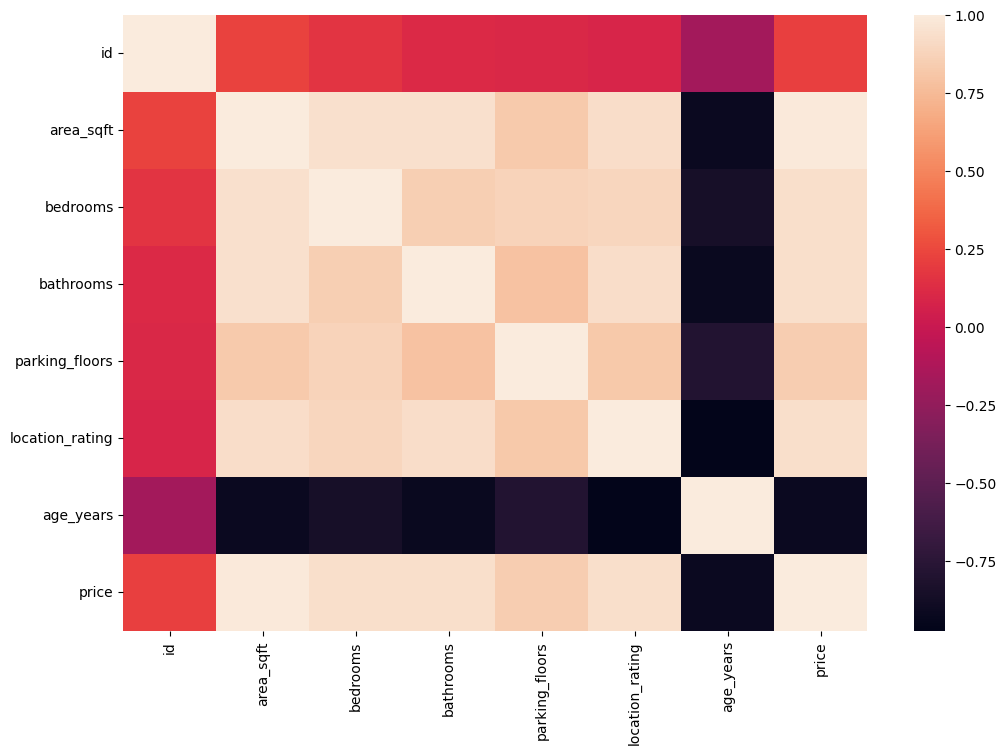

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=False)
plt.show()


In [16]:
data.columns


Index(['id', 'area_sqft', 'bedrooms', 'bathrooms', 'parking_floors',
       'location_rating', 'age_years', 'price'],
      dtype='object')

In [24]:
# Features (all columns except price)
X = data.drop(["id", "price"], axis=1)
y = data["price"]

X.head(), y.head()


(   area_sqft  bedrooms  bathrooms  parking_floors  location_rating  age_years
 0       1200         2          2               1                8          5
 1        900         2          1               1                6         12
 2       1500         3          2               1                7          8
 3       2000         4          3               2                9          3
 4        850         1          1               0                5         15,
 0     6500000
 1     4200000
 2     7800000
 3    12500000
 4     3800000
 Name: price, dtype: int64)

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = model.predict(X_test)


In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 472904282974.3279
R² Score: 0.911976866826556


In [39]:
# New house as DataFrame
feature_cols = X.columns
new_house_df = pd.DataFrame([[1600, 3, 2, 1, 8, 5]], columns=feature_cols)

# Display the DataFrame
new_house_df

,area_sqft,bedrooms,bathrooms,parking_floors,location_rating,age_years
0,1600,3,2,1,8,5


In [42]:
# Scale new house data
new_house_scaled = scaler.transform(new_house_df)

# Predict price
predicted_price = model.predict(new_house_scaled)
print(f"Predicted Price: ₹{predicted_price[0]:,.0f}")

Predicted Price: ₹9,745,925
